# Intoduction

**University:** NOVA Information Management School<br/>
**Program:** Master’s Degree Program in Data Science and Advanced Analytics<br/>
**Academic Year:** 2022/2023

```
============== Students: ==============
Iryna Savchuk (m20211310@novaims.unl.pt)
Cátia Sofia Pereira Parrinha (m20201320@novaims.unl.pt)
Giulia Bovenga (m20221637@novaims.unl.pt)
Hubert Oberhauser (m20220628@novaims.unl.pt)
Leo Allgaier (m20220635@novaims.unl.pt)
=======================================
```
------------------------------
**Data Source**
*   Clean data to perform model training can be downloaded from here: [datasets.zip](https://drive.google.com/file/d/1xMF-lupg9UX-UZUD6NlC2h-Ao08gQ6f3/view?usp=sharing)

* Original data can be downloaded from here: [train](https://storage.googleapis.com/ibeans/train.zip) - [validation](https://storage.googleapis.com/ibeans/validation.zip) - [test](https://storage.googleapis.com/ibeans/test.zip)

* Original data description: https://github.com/AI-Lab-Makerere/ibean/

------------------------------
**References** 

Keras Tuner - https://www.tensorflow.org/tutorials/keras/keras_tuner

------------------------------
**Summary**

The current notebook features a hyperparameter search for various architectures, including the handcrafted model. Hyperparameter tuning is a crucial step in deep learning model development, as it involves finding the ideal hyperparameter set that maximizes performance on a given task. Keras provides an automated way to do this through the use of the hyperband algorithm, which selectively samples hyperparameter configurations to optimize the search process.

In this particular case, the hyperband algorithm was utilized on three different architectures with two different image sizes (128x128 and 256x256) to identify the best hyperparameter sets for each architecture and image size combination, with the aim of improving task performance.

The hyperband algorithm works by running experiments with various hyperparameter configurations, eliminating poorly performing configurations early on and allocating more resources to promising ones. This approach optimizes the search process while minimizing computational cost.

Overall, Keras' hyperparameter tuning with the hyperband algorithm is a powerful method for enhancing deep learning model performance and can be utilized for a broad range of architectures and tasks. In this instance, it resulted in an improvement of the categorical accuracy in the handcrafted model from --- to 91.4%.

The final section of the notebook summarizes the primary [outcomes](#scrollTo=xgSB_k1Bz26x).



------------------------------

# Installing Keras Tuner

In [ ]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 KB 6.7 MB/s eta 0:00:00


# Importing Libraries

In [ ]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras_tuner as kt
from keras import backend as K
from google.colab import drive
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.optimizers.experimental import SGD
from tensorflow.keras import Sequential, layers, initializers, regularizers, optimizers, metrics
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

# Load Image Datasets in Size 128, 128

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_size = (128, 128)
crop_to_aspect_ratio = False
labels='inferred'
color_mode="rgb"
batch_size=16
label_mode="categorical"
shuffle=True
seed=42

In [ ]:
ds_train = image_dataset_from_directory("/content/drive/MyDrive/Uni/DL/Project/datasets/datasets/train",
                                        labels=labels,
                                        image_size=image_size,
                                        crop_to_aspect_ratio=crop_to_aspect_ratio,
                                        color_mode=color_mode,
                                        batch_size=batch_size,
                                        label_mode=label_mode,
                                        shuffle=shuffle,
                                        seed=seed
                                        )

ds_validation = image_dataset_from_directory("/content/drive/MyDrive/Uni/DL/Project/datasets/datasets/validation",
                                             labels=labels,
                                             image_size=image_size,
                                             crop_to_aspect_ratio=crop_to_aspect_ratio,
                                             color_mode=color_mode,
                                             batch_size=batch_size,
                                             label_mode=label_mode,
                                             shuffle=shuffle,
                                             seed=seed
                                             )

ds_test = image_dataset_from_directory("/content/drive/MyDrive/Uni/DL/Project/datasets/datasets/test",
                                       labels=labels, 
                                       image_size=image_size,
                                       crop_to_aspect_ratio=crop_to_aspect_ratio,
                                       color_mode=color_mode,
                                       batch_size=batch_size,
                                       label_mode=label_mode,
                                       shuffle=shuffle,
                                       seed=seed
                                       )

Found 1034 files belonging to 3 classes.
Found 133 files belonging to 3 classes.
Found 128 files belonging to 3 classes.


In [ ]:
input_shape1 = tuple(iter(ds_train).next()[0].shape[1:])

In [ ]:
input_shape1

(128, 128, 3)

# Load Image Datasets in Size 256, 256

In [ ]:
image_size256 = (256, 256)

In [ ]:
ds_train256 = image_dataset_from_directory("/content/drive/MyDrive/Uni/DL/Project/datasets/datasets/train",
                                        labels=labels,
                                        image_size=image_size256,
                                        crop_to_aspect_ratio=crop_to_aspect_ratio,
                                        color_mode=color_mode,
                                        batch_size=batch_size,
                                        label_mode=label_mode,
                                        shuffle=shuffle,
                                        seed=seed
                                        )

ds_validation256 = image_dataset_from_directory("/content/drive/MyDrive/Uni/DL/Project/datasets/datasets/validation",
                                             labels=labels,
                                             image_size=image_size256,
                                             crop_to_aspect_ratio=crop_to_aspect_ratio,
                                             color_mode=color_mode,
                                             batch_size=batch_size,
                                             label_mode=label_mode,
                                             shuffle=shuffle,
                                             seed=seed
                                             )

ds_test256 = image_dataset_from_directory("/content/drive/MyDrive/Uni/DL/Project/datasets/datasets/test",
                                       labels=labels, 
                                       image_size=image_size256,
                                       crop_to_aspect_ratio=crop_to_aspect_ratio,
                                       color_mode=color_mode,
                                       batch_size=batch_size,
                                       label_mode=label_mode,
                                       shuffle=shuffle,
                                       seed=seed
                                       )

Found 1034 files belonging to 3 classes.
Found 133 files belonging to 3 classes.
Found 128 files belonging to 3 classes.


In [ ]:
input_shape2 = tuple(iter(ds_train256).next()[0].shape[1:])

In [ ]:
input_shape2

(256, 256, 3)

# Create Agumentation Layer

In [ ]:
augmentation = Sequential([layers.RandomFlip(), 
                           layers.RandomRotation(factor=0.2), 
                           layers.RandomZoom(height_factor=0.1, width_factor=0.1),
                           layers.RandomContrast(factor=0.3),
                           layers.RandomBrightness(factor=0.3),
                           layers.RandomTranslation(height_factor=(-0.1, 0.1), width_factor=(-0.1, 0.1))], 
                           name="my_augmentation_pipeline")

----------------------------------------------

# Function LeNet

In [ ]:
def LeNet_builder(hp):
    cnn = Sequential([layers.Input((256, 256, 3)),                                  
                      # Data augmentation
                      augmentation,
                      # Data preprocessing
                      layers.Rescaling(1./255),
                      # 1st convLayer
                      layers.Conv2D(
                          filters=hp.Int('conv_1_num_filters', min_value=8, max_value=128, step=8),
                          kernel_size=hp.Choice('conv_1_kernel_size', values = [2,3,4,5,6,7,8]),
                          kernel_initializer=initializers.GlorotNormal(seed=42)
                          ),
                      layers.Activation(hp.Choice('1_activation', values=['relu', 'softmax', 'sigmoid'])),
                      layers.MaxPooling2D(pool_size=hp.Choice('1_pool_size', values = [2,3,4])),
                      # 2nd convLayer
                      layers.Conv2D(
                          filters=hp.Int('conv_2_num_filters', min_value=16, max_value=128, step=8),
                          kernel_size=hp.Choice('conv_2_kernel_size', values = [2,3,4,5,6,7,8]),
                          kernel_initializer=initializers.GlorotNormal(seed=42)
                          ),
                      layers.Activation(hp.Choice('2_activation', values=['relu', 'softmax', 'sigmoid'])),
                      layers.MaxPooling2D(pool_size=hp.Choice('2_pool_size', values = [2,3,4])),
                      # From a HxWxC cuboid to a (H*W*C) vector per image
                      layers.Flatten(),
                      # Classification 
                      layers.Dense(
                          units=3,
                          activation=hp.Choice('dense_activation', values=['relu', 'softmax', 'sigmoid']),
                          kernel_initializer=initializers.GlorotNormal(seed=42)
                          )
                      ], 
                  name="CNN-1"
                  )

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    cnn.compile(loss="categorical_crossentropy",
    optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd']),  
    metrics=[
            metrics.CategoricalAccuracy(name='categorical_accuracy'),
            metrics.AUC(name='AUROC')
          ]
      )
    
    K.set_value(cnn.optimizer.learning_rate, hp_learning_rate)

    return cnn

# Function AlexNet

In [ ]:
def AlexnNet_builder(hp):
    cnn = Sequential([layers.Input((128,128,3)),                                          
                      # Data augmentation
                      augmentation,     
                      # Feature extraction
                      layers.BatchNormalization(),  
                      # P1
                      layers.Conv2D(filters=hp.Int('conv_1_num_filters', min_value=32, max_value=128, step=8),
                                    kernel_size=hp.Choice('conv_1_kernel_size', values = [4,5,6,7,8,9,10,11,12]),
                                    strides=hp.Choice('conv_1_strides', values = [3,4,5]),  
                                    kernel_initializer=initializers.GlorotNormal(seed=42)
                                    ),
                      layers.BatchNormalization(),  
                      layers.Activation(hp.Choice('1_activation', values=['relu', 'softmax', 'sigmoid'])),
                      layers.MaxPooling2D(pool_size=hp.Choice('1_pool_size', values = [2,3,4]),
                                          strides=hp.Choice('1_strides', values = [1,2,3])
                                          ),
                      # P2
                      layers.Conv2D(filters=hp.Int('conv_2_num_filters', min_value=128, max_value=256, step=8),
                                    kernel_size=hp.Choice('conv_2_kernel_size', values = [3,4,5,6,7]),
                                    padding=hp.Choice('conv_2_padding', values=['same']),
                                    kernel_initializer=initializers.GlorotNormal(seed=42)
                                    ),
                      layers.Activation(hp.Choice('2_activation', values=['relu', 'softmax', 'sigmoid'])),
                      layers.MaxPooling2D(pool_size=hp.Choice('2_pool_size', values = [2,3,4]),
                                          strides=hp.Choice('2_strides', values = [1,2,3])
                                          ),
                      # P3
                      layers.Conv2D(filters=hp.Int('conv_3_num_filters', min_value=128, max_value=256, step=8),
                                    kernel_size=hp.Choice('conv_3_kernel_size', values = [2,3,4,5]),
                                    padding=hp.Choice('conv_3_padding', values=['same']),
                                    kernel_initializer=initializers.GlorotNormal(seed=42)
                                    ),
                      layers.Activation(hp.Choice('3_activation', values=['relu', 'softmax', 'sigmoid'])),
                      layers.MaxPooling2D(pool_size=hp.Choice('3_pool_size', values = [2,3,4]),
                                          strides=hp.Choice('3_strides', values = [1,2,3])
                                          ),
                      # From a HxWxC cuboid to a (C) vector per image
                      layers.GlobalAveragePooling2D(),
                      # Classification 
                      layers.Dropout(hp.Choice('dropout', values = [0.2,0.3,0.4])),     
                      layers.Dense(units=3,
                                  activation=hp.Choice('dense_activation', values=['relu', 'softmax', 'sigmoid']),
                                  kernel_regularizer = regularizers.L2(l2=hp.Choice('dropout', values = [0.001, 0.0001, 0.00001])),
                                  bias_regularizer = regularizers.L2(hp.Choice('dropout', values = [0.001, 0.0001, 0.00001])),
                                  kernel_initializer=initializers.GlorotNormal(seed=42)
                                  )
                      ],
                      name="CNN-2"
                      )

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    cnn.compile(loss="categorical_crossentropy",
    optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd']),  
    metrics=[
            metrics.CategoricalAccuracy(name='categorical_accuracy'),
            metrics.AUC(name='AUROC')
          ]
      )
    
    K.set_value(cnn.optimizer.learning_rate, hp_learning_rate)
    

    return cnn

# Function Custom Architecture

In [ ]:
def Custom_builder(hp):
    cnn = Sequential([# The input layer
                      layers.Input((128,128,3)),
                      # Data augmentation
                      augmentation,     
                      # Feature extraction
                      layers.BatchNormalization(),
                      layers.Conv2D(filters=hp.Int('conv_1_num_filters', min_value=32, max_value=128, step=8),
                                    kernel_size=hp.Choice('conv_1_kernel_size', values = [4,5,6,7,8,9,10,11,12]),
                                    strides=hp.Choice('conv_1_strides', values = [3,4,5]),  
                                    kernel_initializer=initializers.GlorotNormal(seed=42)
                                    ),
                      layers.BatchNormalization(),
                      layers.Activation(hp.Choice('1_activation', values=['relu', 'softmax', 'sigmoid'])),
                      layers.MaxPooling2D(pool_size=hp.Choice('1_pool_size', values = [2,3,4]),
                                           strides=hp.Choice('1_strides', values = [1,2,3])
                                           ),
                      layers.Conv2D(filters=hp.Int('conv_2_num_filters', min_value=128, max_value=256, step=8),
                                    kernel_size=hp.Choice('conv_2_kernel_size', values = [3,4,5,6,7]),
                                    padding=hp.Choice('conv_2_padding', values=['same']),
                                    kernel_initializer=initializers.GlorotNormal(seed=42)
                                    ),
                      layers.BatchNormalization(),
                      layers.Activation(hp.Choice('2_activation', values=['relu', 'softmax', 'sigmoid'])),
                      layers.MaxPooling2D(pool_size=hp.Choice('2_pool_size', values = [2,3,4]),
                                          strides=hp.Choice('2_strides', values = [1,2,3])
                                          ),
                      layers.Conv2D(filters=hp.Int('conv_3_num_filters', min_value=128, max_value=256, step=8),
                                    kernel_size=hp.Choice('conv_3_kernel_size', values = [3,4,5,6,7]),
                                    padding=hp.Choice('conv_3_padding', values=['same']),
                                    kernel_initializer=initializers.GlorotNormal(seed=42)
                                    ),
                      layers.BatchNormalization(),
                      layers.Activation(hp.Choice('3_activation', values=['relu', 'softmax', 'sigmoid'])),
                      layers.MaxPooling2D(pool_size=hp.Choice('3_pool_size', values = [2,3,4]),
                                          strides=hp.Choice('3_strides', values = [1,2,3])
                                          ),
                      layers.GlobalMaxPooling2D(),
                      layers.Dropout(hp.Choice('dropout', values = [0.2,0.3,0.4])),
                      # Classification
                      layers.Dense(
                           units=3,
                           activation=hp.Choice('dense_activation', values=['relu', 'softmax', 'sigmoid']),
                           kernel_initializer=initializers.GlorotNormal(seed=42)
                           )
                      ],
                     name="CNN-2"
                     )

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    cnn.compile(loss="categorical_crossentropy",
    optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd']),  
    metrics=[
            metrics.CategoricalAccuracy(name='categorical_accuracy'),
            metrics.AUC(name='AUROC')
          ]
      )
    
    K.set_value(cnn.optimizer.learning_rate, hp_learning_rate)

    return cnn

# Hyperparameter Search

In [ ]:
tuner = kt.Hyperband(
    Custom_builder,
    objective='val_categorical_accuracy',
    max_epochs=100,
    factor=3,
    directory='Custom_128',
    project_name='Custom_128',
    overwrite=True)

In [ ]:
stop_early = EarlyStopping(monitor='val_categorical_accuracy', patience=10)

In [ ]:
tuner.search(ds_train, validation_data=ds_validation, epochs=100, callbacks=[stop_early])

Trial 232 Complete [00h 01m 00s]
val_categorical_accuracy: 0.8571428656578064

Best val_categorical_accuracy So Far: 0.969924807548523
Total elapsed time: 00h 51m 22s


In [ ]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]


In [ ]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(ds_train, epochs=100, validation_data=ds_validation, callbacks=[stop_early])

val_acc_per_epoch = history.history['val_categorical_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/100
65/65 [==============================] - 4s 19ms/step - loss: 1.0379 - categorical_accuracy: 0.5213 - AUROC: 0.7101 - val_loss: 1.0979 - val_categorical_accuracy: 0.3684 - val_AUROC: 0.5044
Epoch 2/100
65/65 [==============================] - 1s 16ms/step - loss: 0.9204 - categorical_accuracy: 0.6054 - AUROC: 0.7822 - val_loss: 1.0967 - val_categorical_accuracy: 0.3383 - val_AUROC: 0.5458
Epoch 3/100
65/65 [==============================] - 1s 16ms/step - loss: 0.8318 - categorical_accuracy: 0.6364 - AUROC: 0.8152 - val_loss: 1.0949 - val_categorical_accuracy: 0.3383 - val_AUROC: 0.5676
Epoch 4/100
65/65 [==============================] - 1s 16ms/step - loss: 0.8127 - categorical_accuracy: 0.6393 - AUROC: 0.8201 - val_loss: 1.0719 - val_categorical_accuracy: 0.4812 - val_AUROC: 0.6973
Epoch 5/100
65/65 [==============================] - 1s 16ms/step - loss: 0.7308 - categorical_accuracy: 0.6963 - AUROC: 0.8616 - val_loss: 1.0576 - val_categorical_accuracy: 0.5038 - val_AURO

In [ ]:
best_hps.values

{'conv_1_num_filters': 64,
 'conv_1_kernel_size': 4,
 'conv_1_strides': 3,
 '1_activation': 'relu',
 '1_pool_size': 3,
 '1_strides': 3,
 'conv_2_num_filters': 224,
 'conv_2_kernel_size': 5,
 'conv_2_padding': 'same',
 '2_activation': 'softmax',
 '2_pool_size': 4,
 '2_strides': 2,
 'conv_3_num_filters': 248,
 'conv_3_kernel_size': 4,
 'conv_3_padding': 'same',
 '3_activation': 'softmax',
 '3_pool_size': 4,
 '3_strides': 1,
 'dropout': 0.3,
 'dense_activation': 'softmax',
 'learning_rate': 0.001,
 'optimizer': 'rmsprop',
 'tuner/epochs': 100,
 'tuner/initial_epoch': 34,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0206'}

In [ ]:
best_epoch

30

In [ ]:
stop_early_final = EarlyStopping(monitor='val_categorical_accuracy', patience=15)

In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
history = hypermodel.fit(ds_train, epochs=100, validation_data=ds_validation, callbacks=[stop_early_final])


Epoch 1/100
65/65 [==============================] - 4s 19ms/step - loss: 1.0401 - categorical_accuracy: 0.4710 - AUROC: 0.6725 - val_loss: 1.0977 - val_categorical_accuracy: 0.3383 - val_AUROC: 0.5353
Epoch 2/100
65/65 [==============================] - 1s 16ms/step - loss: 0.9350 - categorical_accuracy: 0.5996 - AUROC: 0.7739 - val_loss: 1.0958 - val_categorical_accuracy: 0.3383 - val_AUROC: 0.5667
Epoch 3/100
65/65 [==============================] - 1s 16ms/step - loss: 0.8193 - categorical_accuracy: 0.6586 - AUROC: 0.8261 - val_loss: 1.0923 - val_categorical_accuracy: 0.3383 - val_AUROC: 0.6023
Epoch 4/100
65/65 [==============================] - 1s 16ms/step - loss: 0.7906 - categorical_accuracy: 0.6431 - AUROC: 0.8308 - val_loss: 1.0770 - val_categorical_accuracy: 0.3759 - val_AUROC: 0.6906
Epoch 5/100
65/65 [==============================] - 1s 16ms/step - loss: 0.7424 - categorical_accuracy: 0.6857 - AUROC: 0.8549 - val_loss: 1.0582 - val_categorical_accuracy: 0.4135 - val_AURO

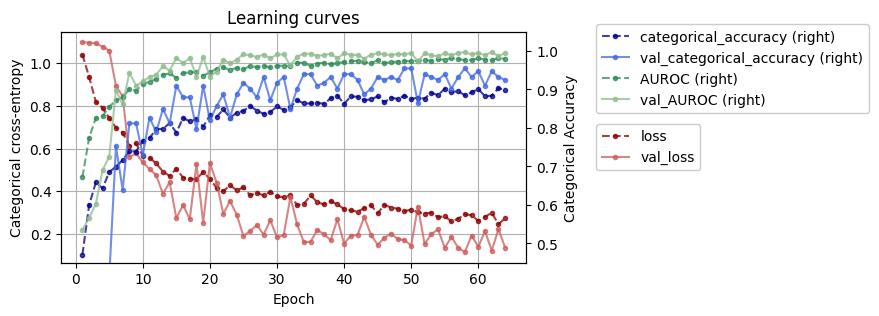

In [ ]:
df_hist = pd.DataFrame.from_dict(history.history)
df_hist["Epoch"] = np.arange(1, len(df_hist) + 1, 1)
# Plot learning curves
secondary_y = ["categorical_accuracy", "val_categorical_accuracy", "AUROC", "val_AUROC"] 
ax = df_hist.plot(x="Epoch", y=['loss', 'val_loss'] + secondary_y,
                  secondary_y = secondary_y, 
                  kind="line", figsize=(6, 3), grid=True, legend=True,
                  ylabel="Categorical cross-entropy", 
                  xlabel="Epoch", title="Learning curves", 
                  style=[".--", ".-"]*3,
                  color=['darkred', 'indianred', "darkblue", "royalblue", "seagreen", "darkseagreen"], 
                         alpha=0.75, fontsize=10)
ax.right_ax.set_ylabel("Categorical Accuracy")
ax.right_ax.legend(loc=(1.15, 0.65), framealpha=1.0)
ax.right_ax.set_ylim(0.45, 1.05)
ax.legend(loc=(1.15, 0.40), framealpha=1.0)
plt.show()

In [ ]:
eval_result = hypermodel.evaluate(ds_test)
print("[test loss, categorical_accuracy, test accuracy]:", eval_result)

8/8 [==============================] - 0s 5ms/step - loss: 0.2236 - categorical_accuracy: 0.9141 - AUROC: 0.9868
[test loss, categorical_accuracy, test accuracy]: [0.22362086176872253, 0.9140625, 0.9868011474609375]


In [ ]:
hypermodel.summary()

Model: "CNN-2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_augmentation_pipeline (S  (None, None, None, 3)    0         
 equential)                                                      
                                                                 
 batch_normalization_8 (Batc  (None, 128, 128, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 42, 42, 64)        3136      
                                                                 
 batch_normalization_9 (Batc  (None, 42, 42, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 42, 42, 64)        0         
                                                             

In [ ]:
%cd /content/drive/MyDrive
%mkdir -p saved_models
hypermodel.save('saved_models/Custom_128')

/content/drive/MyDrive


In [ ]:
loaded_model = load_model("saved_models/Custom_128")

In [ ]:
eval_result_loaded = loaded_model.evaluate(ds_test)
print("[test loss, categorical_accuracy, test accuracy]:", eval_result_loaded)

8/8 [==============================] - 0s 5ms/step - loss: 0.2236 - categorical_accuracy: 0.9141 - AUROC: 0.9868
[test loss, categorical_accuracy, test accuracy]: [0.22362086176872253, 0.9140625, 0.9868011474609375]


# Outcomes

### LeNet Architecture with (128, 128)
```
image_size = (128, 128)
crop_to_aspect_ratio = False
labels='inferred'
color_mode="rgb"
batch_size=16
label_mode="categorical"
shuffle=True
seed=42
```
The HPS gave us: 
```
{'conv_1_num_filters': 16,
 'conv_1_kernel_size': 6,
 '1_activation': 'relu',
 '1_pool_size': 2,
 'conv_2_num_filters': 56,
 'conv_2_kernel_size': 6,
 '2_activation': 'relu',
 '2_pool_size': 4,
 'dense_activation': 'sigmoid',
 'learning_rate': 0.0001,
 'optimizer': 'rmsprop',
 'tuner/epochs': 100,
 'tuner/initial_epoch': 34,
 'tuner/bracket': 3,
 'tuner/round': 3,
 'tuner/trial_id': '0206'}
```

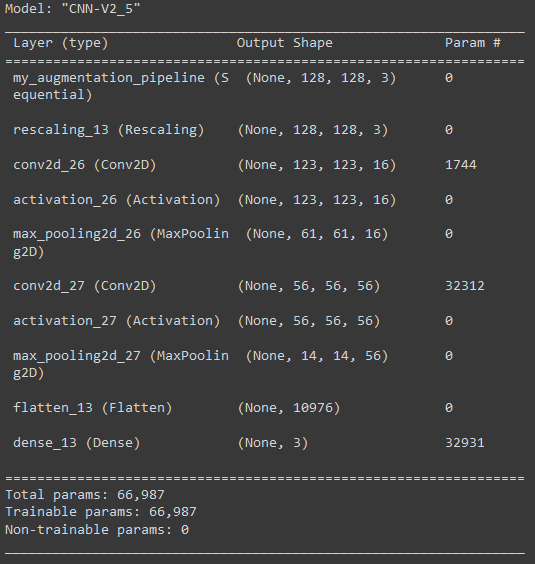

#### Training Curve LeNet

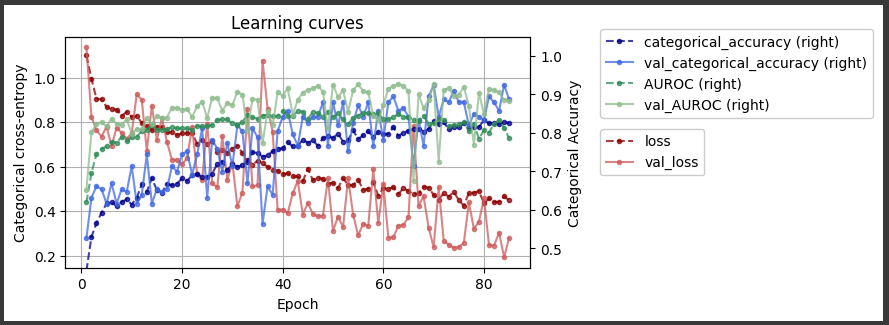

#### LeNet evaluation on test dataset

```
[test loss, categorical_accuracy, test accuracy]: [0.3569413125514984, 0.875, 0.91448974609375]
```



---
---



### LeNet Architecture with (256, 256)
```
image_size256 = (256, 256)
crop_to_aspect_ratio = False
labels='inferred'
color_mode="rgb"
batch_size=16
label_mode="categorical"
shuffle=True
seed=42
```
The HPS gave us: 
```
{'conv_1_num_filters': 128,
 'conv_1_kernel_size': 7,
 '1_activation': 'relu',
 '1_pool_size': 4,
 'conv_2_num_filters': 128,
 'conv_2_kernel_size': 8,
 '2_activation': 'relu',
 '2_pool_size': 4,
 'dense_activation': 'sigmoid',
 'learning_rate': 0.001,
 'optimizer': 'sgd',
 'tuner/epochs': 100,
 'tuner/initial_epoch': 34,
 'tuner/bracket': 4,
 'tuner/round': 4,
 'tuner/trial_id': '0142'}
```
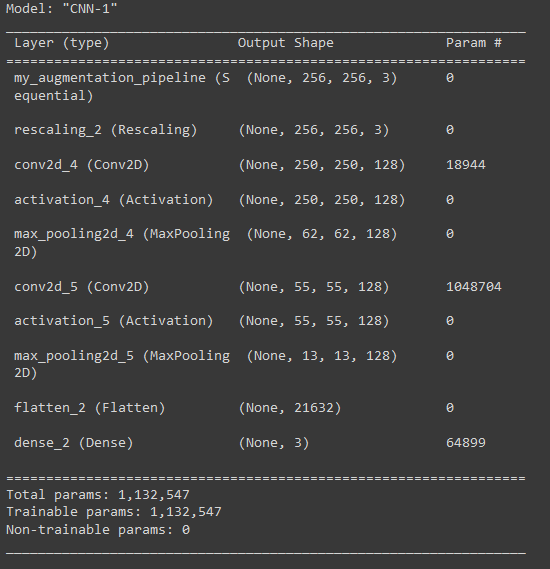


#### Training Curve LeNet
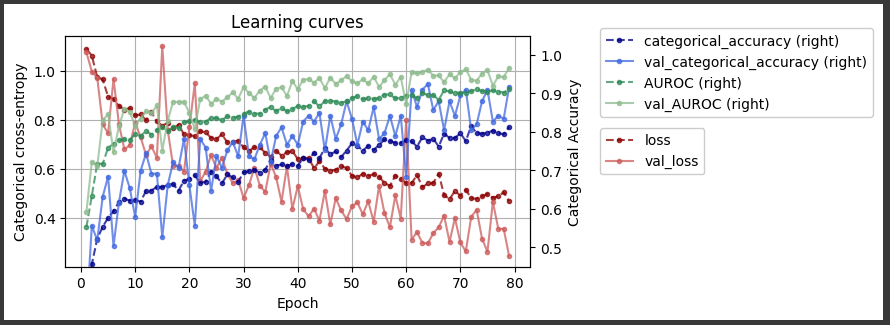

#### LeNet evaluation on test dataset

```
[test loss, categorical_accuracy, test accuracy]: [0.40438395738601685, 0.859375, 0.935699462890625]
```

---
---

### AlexNet Architecture with (128, 128)
```
image_size256 = (128, 128)
crop_to_aspect_ratio = False
labels='inferred'
color_mode="rgb"
batch_size=16
label_mode="categorical"
shuffle=True
seed=42
```
The HPS gave us: 
```
{'conv_1_num_filters': 96,
 'conv_1_kernel_size': 9,
 'conv_1_strides': 5,
 '1_activation': 'relu',
 '1_pool_size': 3,
 '1_strides': 2,
 'conv_2_num_filters': 232,
 'conv_2_kernel_size': 7,
 'conv_2_padding': 'same',
 '2_activation': 'sigmoid',
 '2_pool_size': 2,
 '2_strides': 2,
 'conv_3_num_filters': 232,
 'conv_3_kernel_size': 3,
 'conv_3_padding': 'same',
 '3_activation': 'relu',
 '3_pool_size': 3,
 '3_strides': 3,
 'dropout': 0.4,
 'dense_activation': 'softmax',
 'learning_rate': 0.0001,
 'optimizer': 'adam',
 'tuner/epochs': 100,
 'tuner/initial_epoch': 34,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': '0210'}
```

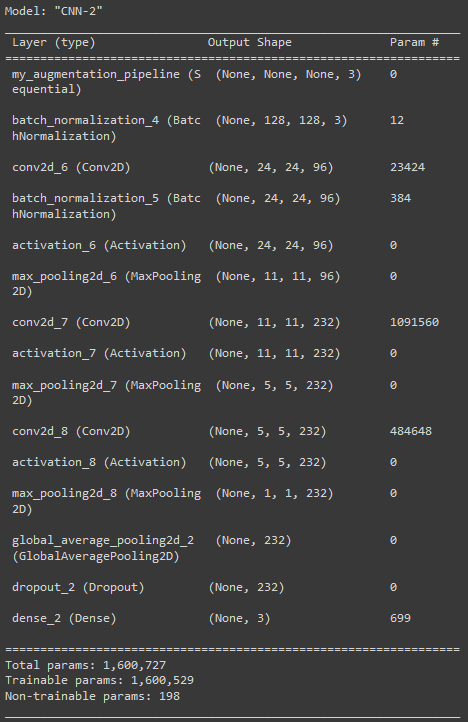

#### Training Curve AlexNet
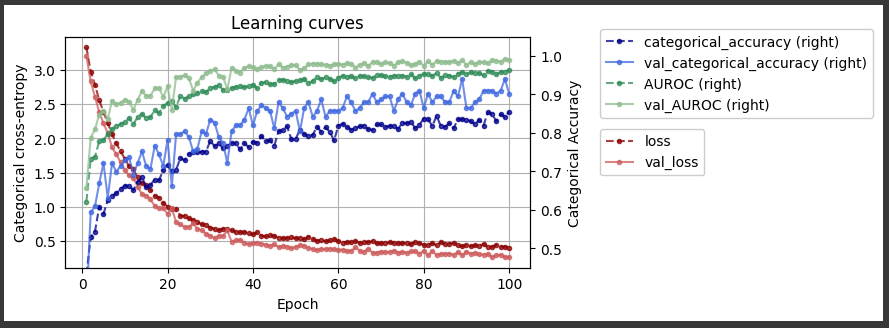

#### AlexNet evaluation on test dataset




```
[test loss, categorical_accuracy, test accuracy]: [0.3871889114379883, 0.8828125, 0.9662628173828125]
```

---
---

### AlexNet Architecture with (256, 256)
```
image_size256 = (256, 256)
crop_to_aspect_ratio = False
labels='inferred'
color_mode="rgb"
batch_size=16
label_mode="categorical"
shuffle=True
seed=42
```
The HPS gave us: 
```
{'conv_1_num_filters': 48,
 'conv_1_kernel_size': 11,
 'conv_1_strides': 3,
 '1_activation': 'sigmoid',
 '1_pool_size': 4,
 '1_strides': 3,
 'conv_2_num_filters': 160,
 'conv_2_kernel_size': 4,
 'conv_2_padding': 'valid',
 '2_activation': 'relu',
 '2_pool_size': 2,
 '2_strides': 3,
 'conv_3_num_filters': 240,
 'conv_3_kernel_size': 2,
 'conv_3_padding': 'same',
 '3_activation': 'relu',
 '3_pool_size': 4,
 '3_strides': 1,
 'dropout': 0.2,
 'dense_activation': 'sigmoid',
 'learning_rate': 0.001,
 'optimizer': 'rmsprop',
 'tuner/epochs': 100,
 'tuner/initial_epoch': 34,
 'tuner/bracket': 3,
 'tuner/round': 3,
 'tuner/trial_id': '0191'}
```
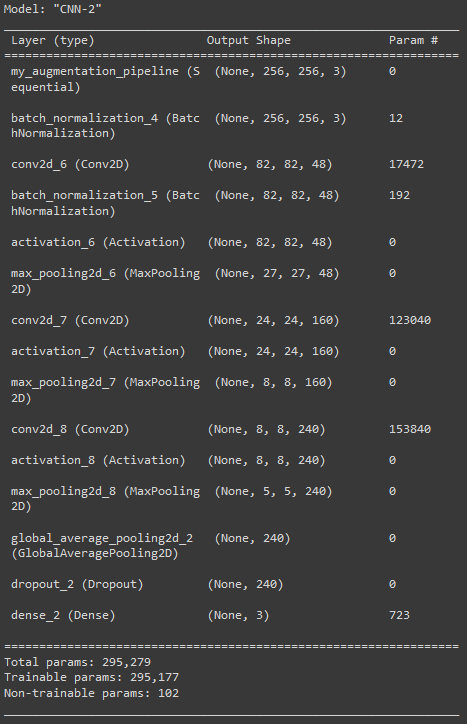

#### Training Curve AlexNet

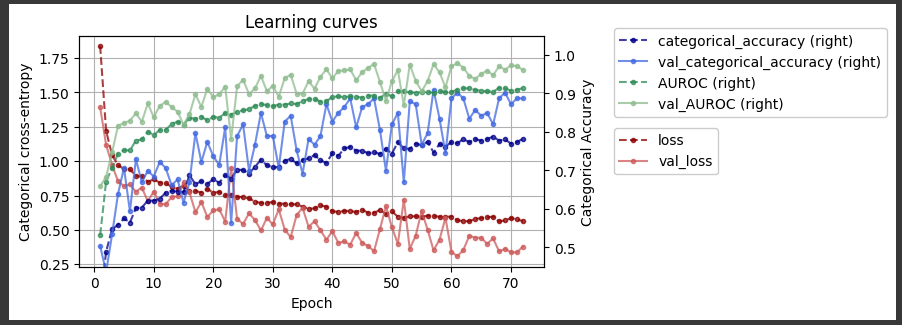

#### AlexNet evaluation on test dataset



```
[test loss, categorical_accuracy, test accuracy]: [0.5259636640548706, 0.7890625, 0.923492431640625]
```





---

---



### Custom Architecture with (128, 128)


```
image_size = (128, 128)
crop_to_aspect_ratio = False
labels='inferred'
color_mode="rgb"
batch_size=16
label_mode="categorical"
shuffle=True
seed=42

```
The HPS gave us:



```
 {'conv_1_num_filters': 64,
 'conv_1_kernel_size': 4,
 'conv_1_strides': 3,
 '1_activation': 'relu',
 '1_pool_size': 3,
 '1_strides': 3,
 'conv_2_num_filters': 224,
 'conv_2_kernel_size': 5,
 'conv_2_padding': 'same',
 '2_activation': 'softmax',
 '2_pool_size': 4,
 '2_strides': 2,
 'conv_3_num_filters': 248,
 'conv_3_kernel_size': 4,
 'conv_3_padding': 'same',
 '3_activation': 'softmax',
 '3_pool_size': 4,
 '3_strides': 1,
 'dropout': 0.3,
 'dense_activation': 'softmax',
 'learning_rate': 0.001,
 'optimizer': 'rmsprop',
 'tuner/epochs': 100,
 'tuner/initial_epoch': 34,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0206'}
```
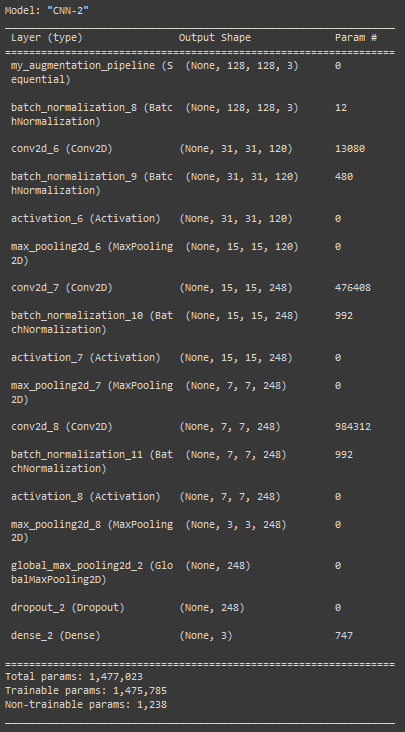



#### Training Curve Custom Architecture
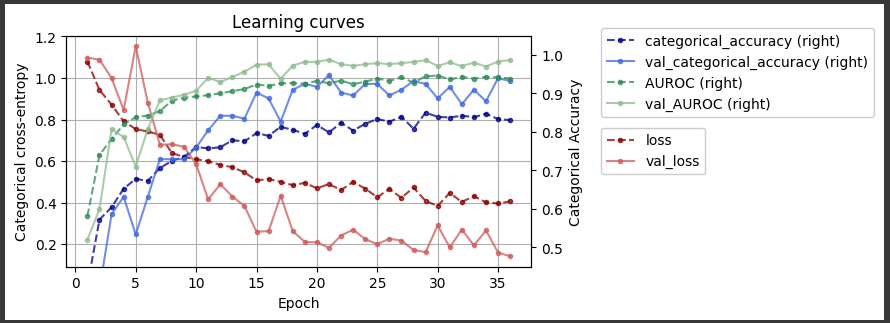

#### Custom Architecture evaluation on test dataset




```
[test loss, categorical_accuracy, test accuracy]: [0.22362086176872253, 0.9140625, 0.9868011474609375]
```



### Custom Architecture with (256, 256)

```
image_size = (256, 256)
crop_to_aspect_ratio = False
labels='inferred'
color_mode="rgb"
batch_size=16
label_mode="categorical"
shuffle=True
seed=42

```
The HPS gave us:



```
 {'conv_1_num_filters': 32,
 'conv_1_kernel_size': 11,
 'conv_1_strides': 4,
 '1_activation': 'softmax',
 '1_pool_size': 4,
 '1_strides': 3,
 'conv_2_num_filters': 168,
 'conv_2_kernel_size': 5,
 'conv_2_padding': 'same',
 '2_activation': 'relu',
 '2_pool_size': 3,
 '2_strides': 2,
 'conv_3_num_filters': 208,
 'conv_3_kernel_size': 7,
 'conv_3_padding': 'same',
 '3_activation': 'softmax',
 '3_pool_size': 4,
 '3_strides': 2,
 'dropout': 0.3,
 'dense_activation': 'softmax',
 'learning_rate': 0.001,
 'optimizer': 'adam',
 'tuner/epochs': 100,
 'tuner/initial_epoch': 34,
 'tuner/bracket': 4,
 'tuner/round': 4,
 'tuner/trial_id': '0143'}
```
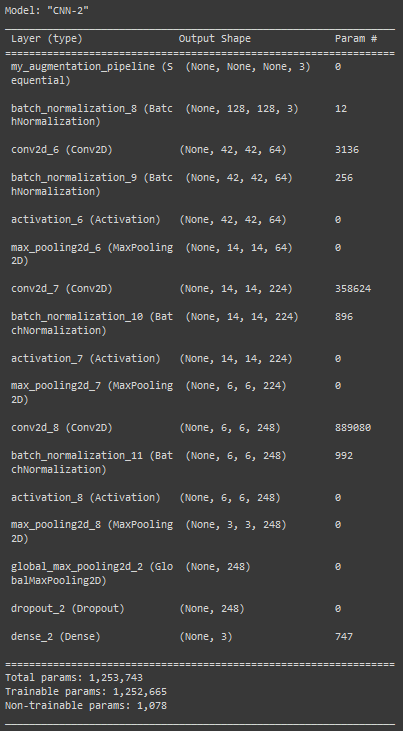

#### Training Curve Custom Architecture
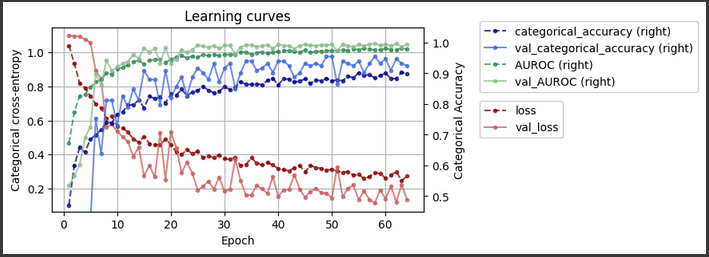

#### Custom Architecture evaluation on test dataset



```
[test loss, categorical_accuracy, test accuracy]: [0.28302156925201416, 0.875, 0.9769439697265625]

```



## Conclusion

| Model | Accuracy on Test Dataset before HPS | Accuracy on Test Dataset after HPS|
| :---: | :---: | :---: |
| LeNet(128,128,3)  |  -- | 0.8750 |
| AlexNet(128,128,3) |  -- | 0.8828 |
| **Custom (128,128,3**) |  -- | **0.9140** |
| LeNet(256,256,3) | --| 0.859 |
| AlexNet(256,256,3) |  -- | 0.7891 |
| Custom(256,256,3) |  -- | 0.8750 |

All networks showed superior performance when using images that were 128x128 in size. The Custom Architecture achieved the highest categorical accuracy (91.40%) on the test dataset, so we were able to increase the accuracy by --%, as previously mentioned. The training curves for all models indicate that none of them are overfitting, as the validation accuracy is consistently higher than the training accuracy. However, when evaluated against the test set, they were unable to achieve a similar score to the validation accuracy (which was for example approximately 96% for the Custom 128x128). The Hyperparameters for each model that were discovered during the HPS can be found in their respective sections.